In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('cat.gif').convert('RGB')
im.save('cat.jpg')

In [4]:
image = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)

In [5]:
roberts_x = cv2.filter2D(image, -1, np.array([[1, 0], [0, -1]]))
roberts_y = cv2.filter2D(image, -1, np.array([[0, 1], [-1, 0]]))


roberts_magnitude = np.sqrt(roberts_x**2 + roberts_y**2)


Text(0.5, 1.0, 'Roberts Magnitude')

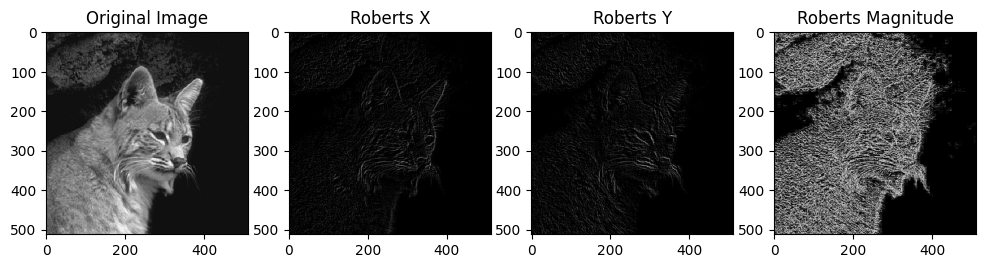

In [7]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1), plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 4, 2), plt.imshow(roberts_x, cmap='gray')
plt.title('Roberts X')

plt.subplot(1, 4, 3), plt.imshow(roberts_y, cmap='gray')
plt.title('Roberts Y')

plt.subplot(1, 4, 4), plt.imshow(roberts_magnitude, cmap='gray')
plt.title('Roberts Magnitude')

In [8]:
prewitt_x = cv2.filter2D(image, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv2.filter2D(image, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))


prewitt_magnitude = np.sqrt(prewitt_x**2 + prewitt_y**2)


Text(0.5, 1.0, 'Prewitt Magnitude')

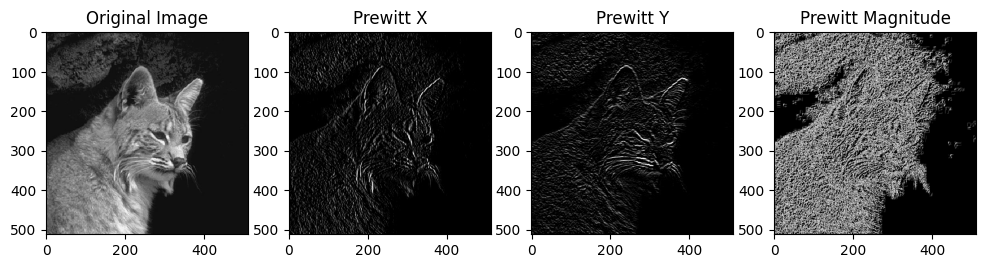

In [9]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1), plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 4, 2), plt.imshow(prewitt_x, cmap='gray')
plt.title('Prewitt X')

plt.subplot(1, 4, 3), plt.imshow(prewitt_y, cmap='gray')
plt.title('Prewitt Y')

plt.subplot(1, 4, 4), plt.imshow(prewitt_magnitude, cmap='gray')
plt.title('Prewitt Magnitude')

Text(0.5, 1.0, 'Difference')

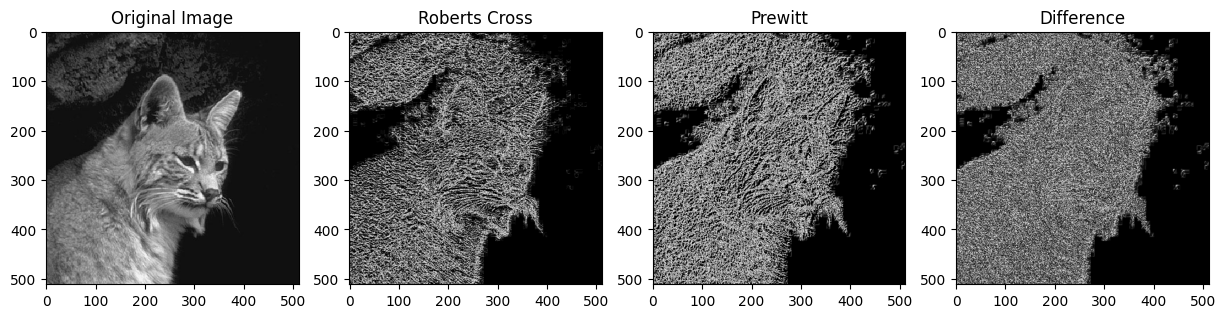

In [11]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1), plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 4, 2), plt.imshow(roberts_magnitude, cmap='gray')
plt.title('Roberts Cross')

plt.subplot(1, 4, 3), plt.imshow(prewitt_magnitude, cmap='gray')
plt.title('Prewitt')

plt.subplot(1, 4, 4), plt.imshow(np.abs(roberts_magnitude - prewitt_magnitude), cmap='gray')
plt.title('Difference')

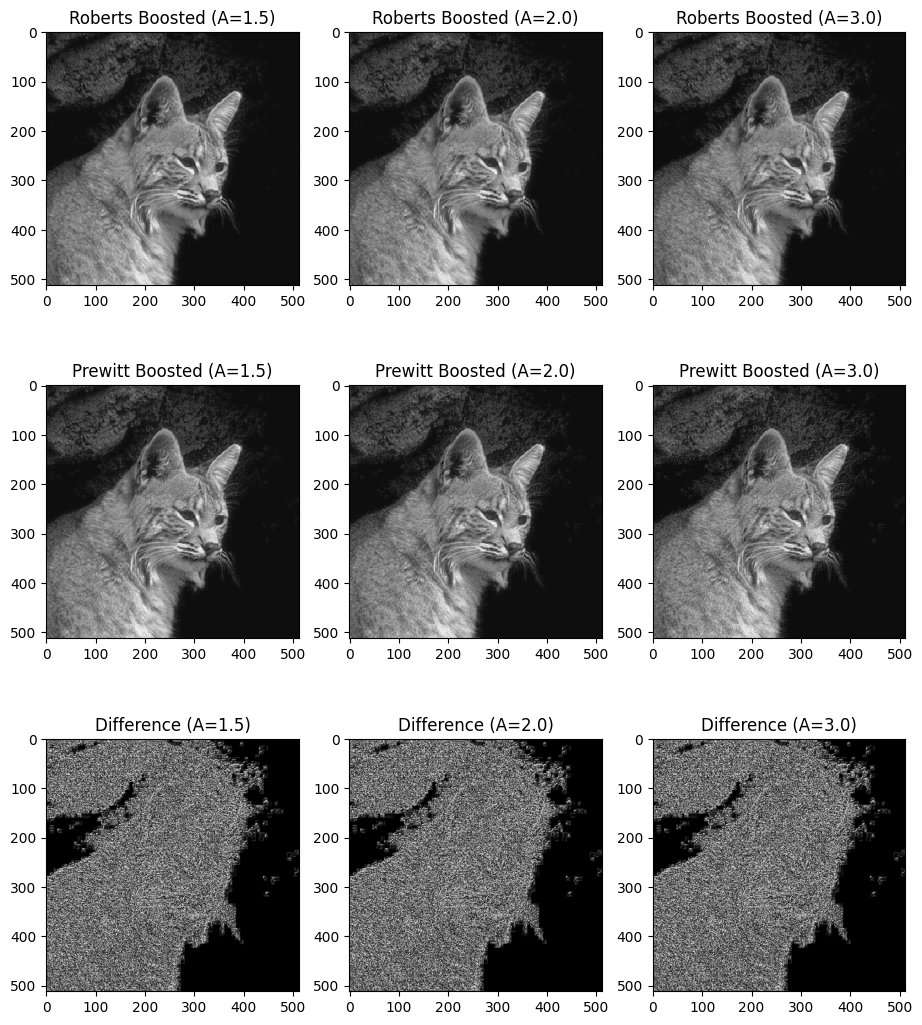

: 

In [19]:
A_values = [1.5, 2.0, 3.0]  # Experiment with different values of 'A'

# Display the images with high-boost filtering
plt.figure(figsize=(15, 13))

for i, A in enumerate(A_values, 1):
    # High-boost filter for Roberts Cross
    roberts_high_boost = A * roberts_magnitude + image

    # High-boost filter for Prewitt
    prewitt_high_boost = A * prewitt_magnitude + image

    # Display the results
    plt.subplot(3, 4, i), plt.imshow(roberts_high_boost, cmap='gray')
    plt.title(f'Roberts Boosted (A={A})')

    plt.subplot(3, 4, i + 4), plt.imshow(prewitt_high_boost, cmap='gray')
    plt.title(f'Prewitt Boosted (A={A})')

    plt.subplot(3, 4, i + 8), plt.imshow(np.abs(roberts_high_boost - prewitt_high_boost), cmap='gray')
    plt.title(f'Difference (A={A})')